<a href="https://colab.research.google.com/github/nabilanewaz/DSP/blob/main/Nabila_Newaz_210041216_CSE_4632_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2**<br>

The purpose of today's lab is to obtain a practical understanding of how convolution is performed in Digital Signal Processing. There are basically two methods of performing convolution, which only differ in the way the samples are looped and summed. The result for both methods are the same. Here is an example of applying convolution using both input side and output side algorithm:
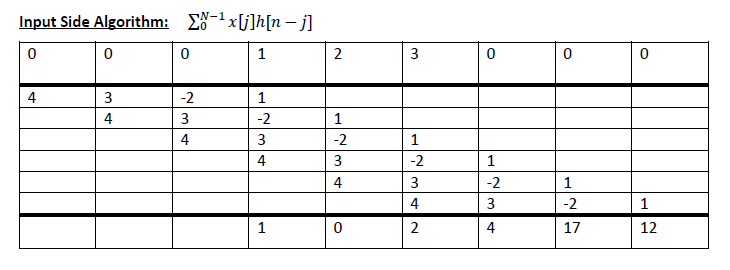

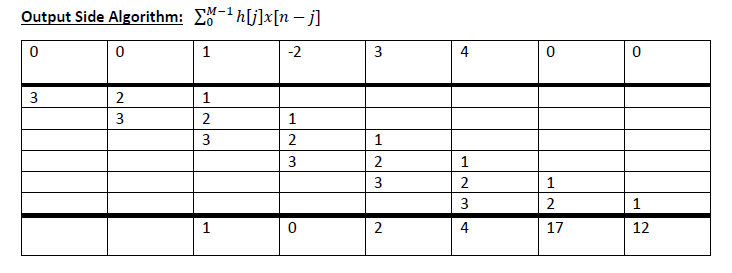

Now execute the following cell to load the sample input signal and impulse response. The sample output is also generated using the built-in convolve function of numpy for your reference:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4,-3,2,2,3,4])
h = np.array([-2,1,-2])

y = np.convolve(x,h)
print(y)

[ -8  10 -15   4  -8  -9  -2  -8]


##Task 1
Write a function named convInputSide() that takes the input signal $x$ as the first parameter and the impulse response $h$ as the second parameter and generates the output signal $y$. The function should account for any necessary padding.

In [6]:
def convInputSide(x, h):
  #your code here
    N = len(x)
    M = len(h)
    Q = N + M - 1

    y = [0] * Q

    for i in range(Q):
        sum_val = 0
        for j in range(N):
            if 0 <= i - j < M:
                sum_val += x[j] * h[i - j]
        y[i] = sum_val

    return np.array(y)

print(convInputSide(x,h))

[ -8  10 -15   4  -8  -9  -2  -8]


##Task 2
Write a function named convOutputSide() that takes the input signal $x$ as the first parameter and the impulse response $h$ as the second parameter and generates the output signal $y$. The function should account for any necessary padding.


In [8]:
def convOutputSide(x, h):
  #your code here
    N = len(x)
    M = len(h)
    Q = N + M - 1

    y = [0] * Q

    for i in range(Q):
        sum_val = 0
        for j in range(M):
            if 0 <= i - j < N:
                sum_val += x[i - j] * h[j]
        y[i] = sum_val

    return np.array(y)

print(convOutputSide(x,h))


[ -8  10 -15   4  -8  -9  -2  -8]


##Task 3
Now we will learn how to load and work with actual audio signals instead of arbitrary signals. Upload the given audio file and run the following cell.

In [3]:
from scipy.io.wavfile import read, write
from IPython.display import Audio

Fs, data = read('/content/sample_data/Nabila Newaz 210041216 - StarWars3.wav')

print(Fs)
Audio(data, rate=Fs)

22050


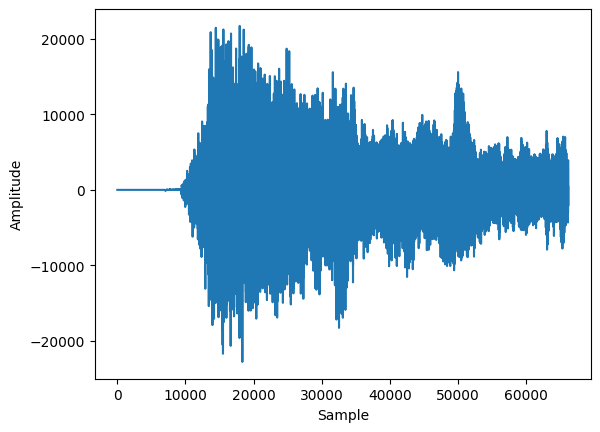

In [4]:
plt.figure
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Now apply any one of your implemented convolution functions to delay the audio by $0.5$ second.

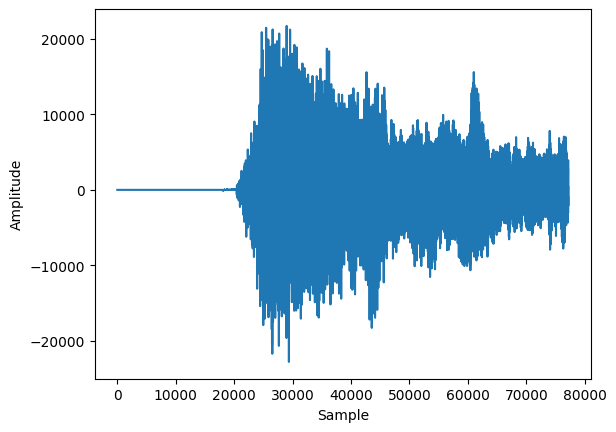

11025


In [22]:
#Your code here
delay_seconds = 0.5
delay_samples = int(delay_seconds * Fs)
h = [0] * (delay_samples + 1)
h[delay_samples] = 1
delayed_data = convOutputSide(data.tolist(), h)

plt.figure
plt.plot(delayed_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

print(delay_samples)
Audio(delayed_data, rate=Fs)

In [26]:
n = len(data) + len(h) - 1
N = 2 ** int(np.ceil(np.log2(n)))

X = np.fft.fft(data, n=N)
H = np.fft.fft(h, n=N)

Y = X * H
y = np.fft.ifft(Y)
y = np.real(y)
y = y[:n]

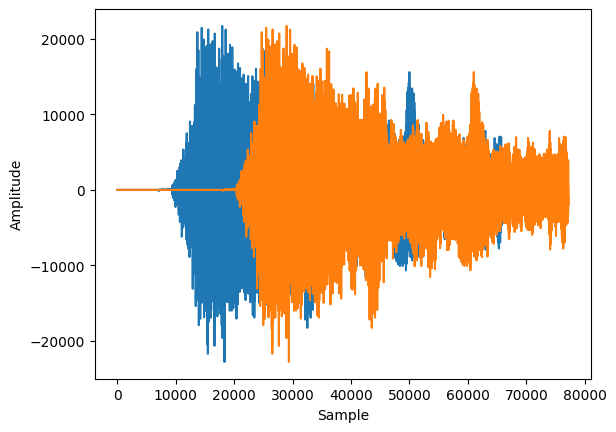

In [27]:
plt.figure
plt.plot(data)
plt.plot(y)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()